### Shrinkage Methods

Shrinkage is a form of regularization, especially useful when $p>>N$. 
Note: 
- Shrinkage is **not scale-invariant**, so it is better to scale $X$ first. 
 
-  Also note that in the below, intercept is not included, i.e. **we do not penalize intercept**. The reason is that intercept is usually the mean of the data, and it does not make sense not to let the model learn the sample mean.

#### Ridge

$\hat{\beta}^{(ridge)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2+\lambda\sum_{j=1}^p\beta_j^2]$

- An equivalent way to write the ridge regression problem is $\hat{\beta}^{(ridge)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2]$, subject to $\sum_{j=1}^p\beta_j^2\leq t$. There is a one-to-one correspondence between the parameter $\lambda$ above and $t$ here, when $t$ is not too large.
 
- Ridge regression is equivalent to having a **normal prior** in Bayesian regression (though technically there should be an inverse gamma prior on $\sigma^2$ as well).
 
- Ridge regression has a **closed-form solution**: $\hat{\beta}_{ridge}=(X^{T}X+\lambda I)^{-1}X^{T}y$. The solution adds a positive constant to the diagonal of $X^{T}X$ before inversion. 
    - This **makes the problem nonsingular, even if $X^{T}X$ is not of full rank**, and was the main motivation for ridge regression when it was first introduced in statistics. 
     - In the case of orthogonal inputs, i.e. when the column vectors of $X$ are orthogonal to each other, the ridge estimates are just a **scaled version of the least square estimates**: $\hat{\beta}_{ridge}=\hat{\beta}/(1+\lambda)$.
     - To view ridge regression under the Singular Value Decomposition (SVD), note that under the SVD: $X=UDV^{T}$, and $X\hat{\beta}=X(X^{T}X)^{-1}X^{T}y=UU^{T}y$. That is, the predicted values from linear regression is simply project $y$ onto the unit principle components (we call $UD$ as the principle components; see the notebook on [PCA](../unsupervised_learning/PCA.ipynb)). 
- The predicted values from ridge regression is different: $X\hat{\beta}^{ridge}=X(X^{T}X+\lambda I)^{-1}X^{T}y=UD(D^2+\lambda I)^{-1}DU^{T}y=\sum_{j=1}^p u_j\frac{d_j^2}{d_j^2+\lambda}u_j^{T}y$. That is, after getting the coordinates $u_j^{T}y$, it is first shrinked by factors of $\frac{d_j^2}{d_j^2+\lambda}$ before scaling $u_j$. 
     - This means that a greater amount of shrinkage is applied to the coordinates of basis vectors with smaller $d_j^2$. Recall that $d_j^2$ are the variation of $X$ along the corresponding principle direction. Thus in this sense, what ridge regression does is **to minimize variations along the short directions and preserve large variation along long directions**. In a way, **it is selecting principle components in a soft sense**.
     - As such, people define the **effective degrees of freedom** of the ridge regression fit as a generalization of ordinary linear regression: $df(\lambda)=trace(X(X^{T}X+\lambda I)^{-1}X^{T})=\sum_{j=1}^p u_j\frac{d_j^2}{d_j^2+\lambda}$. **The larger the $\lambda$, the stronger the regularization effect and the less the effective degrees of freedom**.
 
- Empirically, rather than producing a sparse solution (drive many coefficients to $0$), ridge regression will penalize the largest coefficients, but **does not avoid giving many evenly small coefficients**.

#### Lasso 

$\hat{\beta}^{(lasso)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2+\lambda\sum_{j=1}^p|\beta_j|]$

- An equivalent way to write the lasso regression problem is $\hat{\beta}^{(lasso)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2]$, subject to $\sum_{j=1}^p|\beta_j|\leq t$. There is a one-to-one correspondence between the parameter $\lambda$ above and $t$ here, when $t$ is not too large.

- Lasso regression is equivalent to having an **exponential prior** in Bayesian regression (though technically there should be an inverse gamma prior on $\sigma^2$ as well).
 
- While ridge regression does a proportional shrinkage, **lasso translates each coefficient by a constant factor $\lambda$, truncating at zero**. This statement can only be understood intuitively for lasso, since lasso does not have a closed-form solution. 
 
- Computing the lasso solution numerically is a **quadratic programming problem**, but there are efficient algorithms available for computing the entire path of solutions as $\lambda$ is varied, with the same computational cost as for ridge regression (relating to least angle regression, discussed in Section 3.4.3 in [ESL](https://www.evernote.com/shard/s191/nl/21353936/c2a0e9ac-da49-4fee-8701-3cd70fc42134?title=The%20Elements%20of%20Statistical%20Learning_print12.pdf), which also contains further discussions about the effective degrees of freedom).
    - To solve lasso efficiently, transform the problem into a QP, by separating the positive and negative parts: $w=w^+-w^-$.
 
- Though lasso tends to produce sparse loadings (as to why, see a graph below), and make the designed matrix less ill-conditioned, **lasso is not an effective guard against highly-correlated feature space, especially when the two features are of the same scale** (Think the extreme case: two feature are equal $x_1=x_2$, then any solution with $|w_1|+|w_2|=k$ are equivalent to lasso, and it also **makes the final estimated coefficients highly unstable**). As such, **it is not immune to overfit noisy features**, especially when $p>>N$. One way to get around it is to use [supervised principal component](../unsupervised-learning/PCA.ipynb) to 'de-noise' the observations first.


#### Elastic Net

a convex combination of ridge and lasso in the penalizing term: $= argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2+\lambda(\sum_{j=1}^p\alpha\beta_j^2+(1-\alpha)|\beta_j|)]$
 
- Empirically it is sometimes hard to distinguish elastic net with penalty term $\sum_{j=1}^p|\beta_j|^q$ for some $q\neq 1,2$.
 
- The motivation for elastic net or general $q$ as above is to get the best of both worlds: 
     - on the one hand, lasso tends to shrink parameters to zero, producing sparse solutions; 
     - on the other hand, it may be beneficial that correlated regressors are shrinked together just as ridge would do (recall the extreme example in lasso of $x_1=x_2$). 
 
- The intuition of the aforementioned behavior of the two shrinkages can be seen in the graph at the bottom: When $p>2$, the diamond in lasso becomes a rhomboid, and has many corners, flat edges and faces; there are many more opportunities for the estimated parameters to be zero.
    - Formally, we have the following theorem to make sure that in elastic net, **coefficients with highly-correlated variables tend to shrink together**. Let $\rho_{ij}=\hat{corr}(x_i, x_j)$. Suppose $\hat{w}_i$ and $\hat{w}_j$ are selected by elastic net, with $y$ centered and variables $x_1, \dots, x_p$ standardized. If $\hat{w_i}\hat{w_j}>0$, then 
 \begin{align}
 |\hat{w_i}-\hat{w_j}|\leq \frac{|y|\sqrt{2}}{\alpha\lambda}\sqrt{1-\rho_{ij}}.
 \end{align}

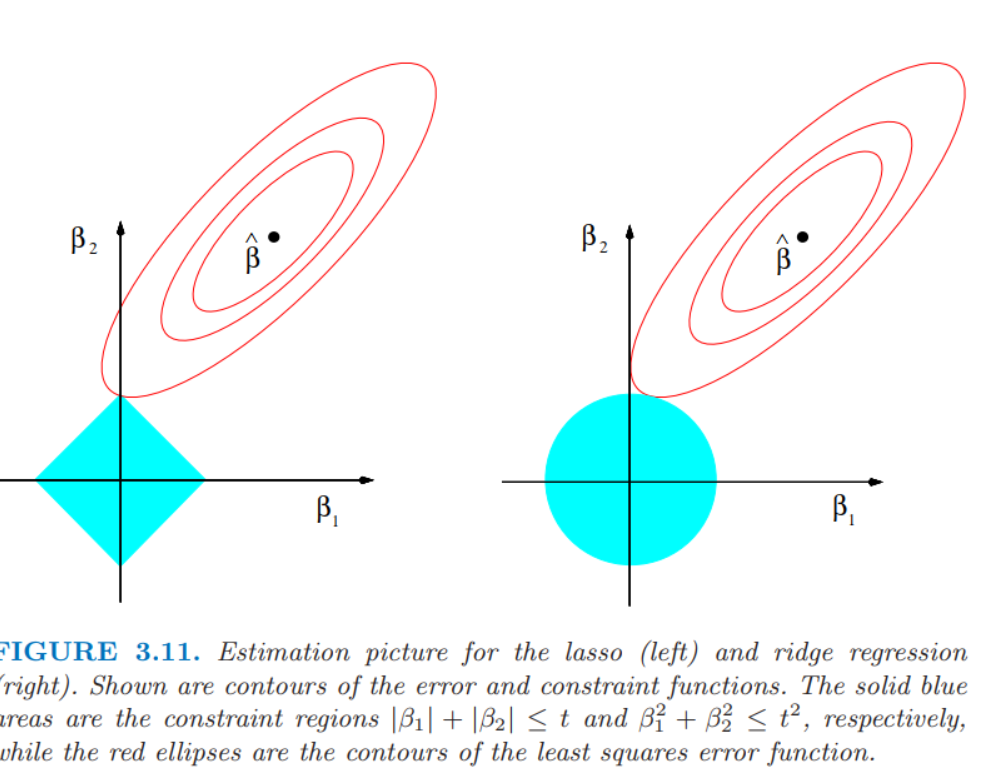